# Dataset: Water Quality - Drinking Water Potability

## Download: 
https://www.kaggle.com/adityakadiwal/water-potability
## Goal: 
Classification - predict if water is safe for consumption
## Description:
Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.
## Note: 
Treat missing value if any and check for data imbalance.

## Technologies: 
Logistic Regression, Decision Trees, Random Forest, KNN, Support Vector Classifier

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [2]:
# Read the data from the CSV file
df = pd.read_csv("water_potability.csv")

In [3]:
# Show some data from the dataset
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
# Get information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


# Data cleaning

In [5]:
# Check for null values
print(df.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [6]:
# Fill null values with column means
df_columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']
for column in df_columns:
    df[column].fillna((df[column].mean()), inplace=True)

In [7]:
# Check if null values were successfully removed
print(df.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


# Data Exploration & Visualization

In [8]:
# Generate descriptive statistics
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [9]:
# Calculate and show the correlation matrix
corr = df.corr()
corr

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


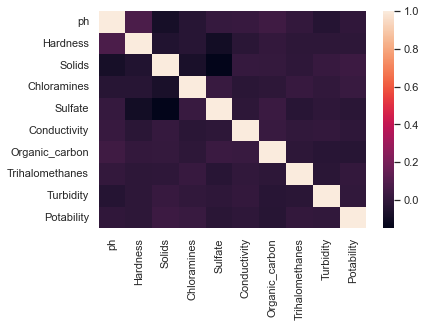

In [10]:
# Calculate and plot the correlation matrix
sns.set()
sns.heatmap(corr)
plt.show()

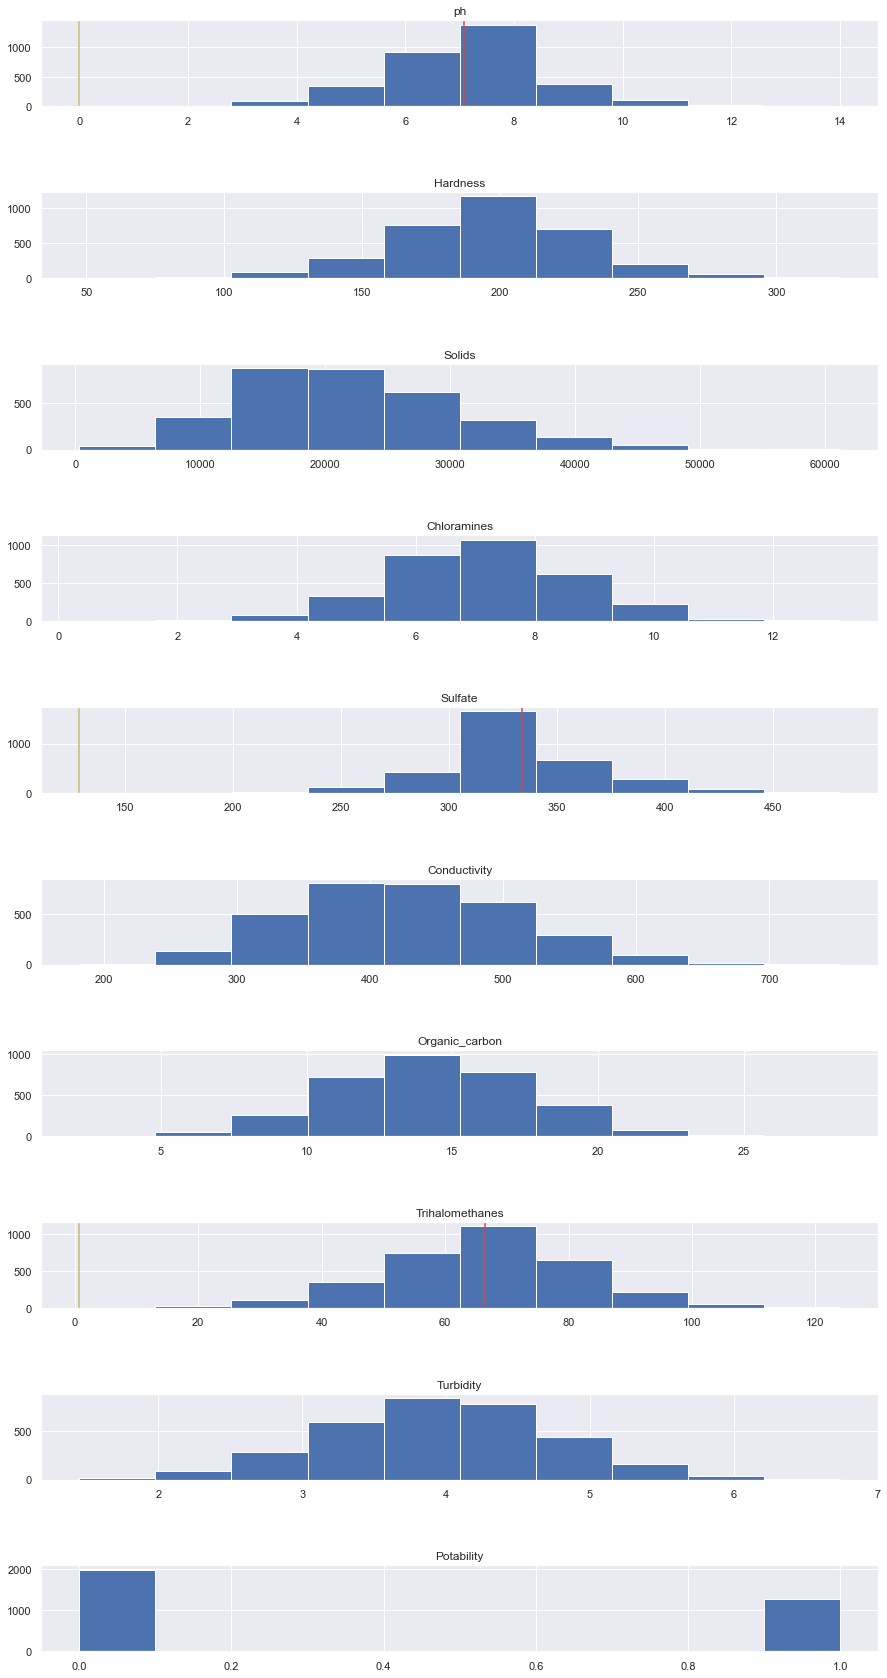

In [11]:
# Show the distribution of each column in the dataset
fig, ax = plt.subplots(10, figsize=(15, 30))
for i, column in enumerate(df.columns):
    ax[i].hist(df[column])
    ax[i].set_title(column)
    if i in [0, 4, 7]:
        ax[i].axvline(df[column].min(), c='y')
        ax[i].axvline(df[column].median(), c='r')

plt.subplots_adjust(hspace=1)
plt.show()

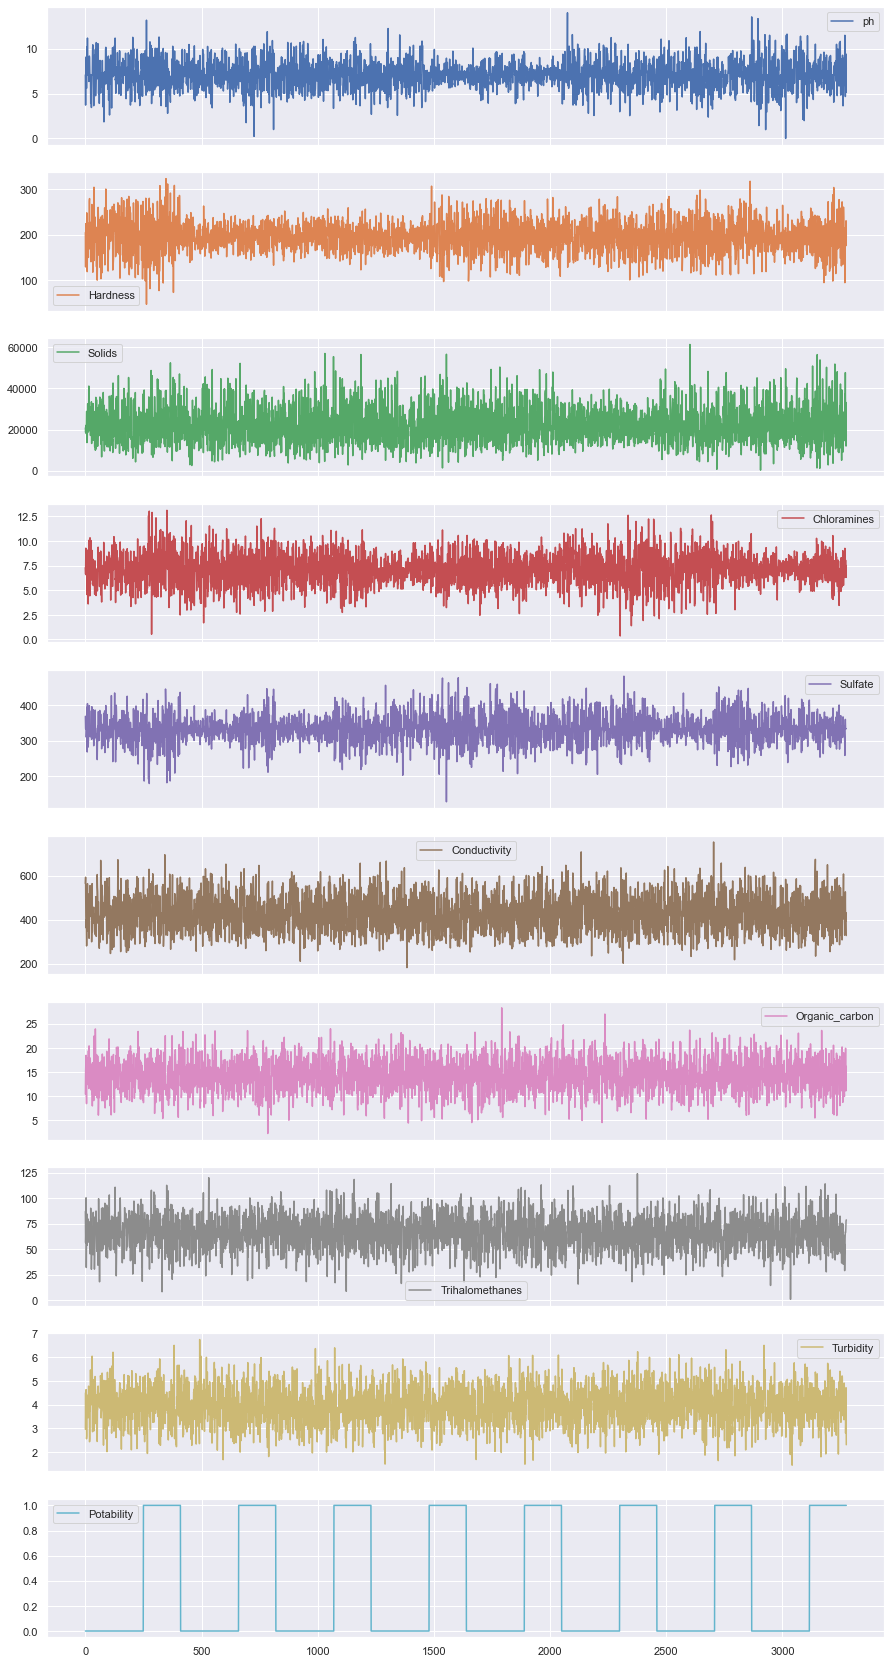

In [12]:
# Create subplots for each column to see outliers
df.plot(subplots=True, figsize=(15, 30))
plt.show()

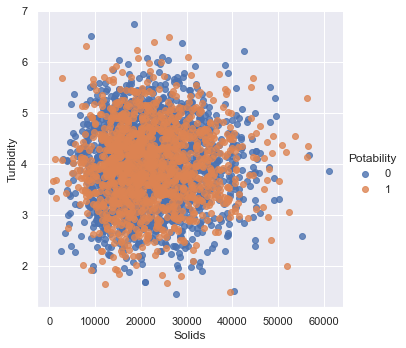

In [13]:
# Scatterplot for columns that are most correlated with Potability (Solids, Turbidity)
sns.lmplot(x="Solids", y="Turbidity", data=df, hue="Potability", fit_reg=False)
plt.show()

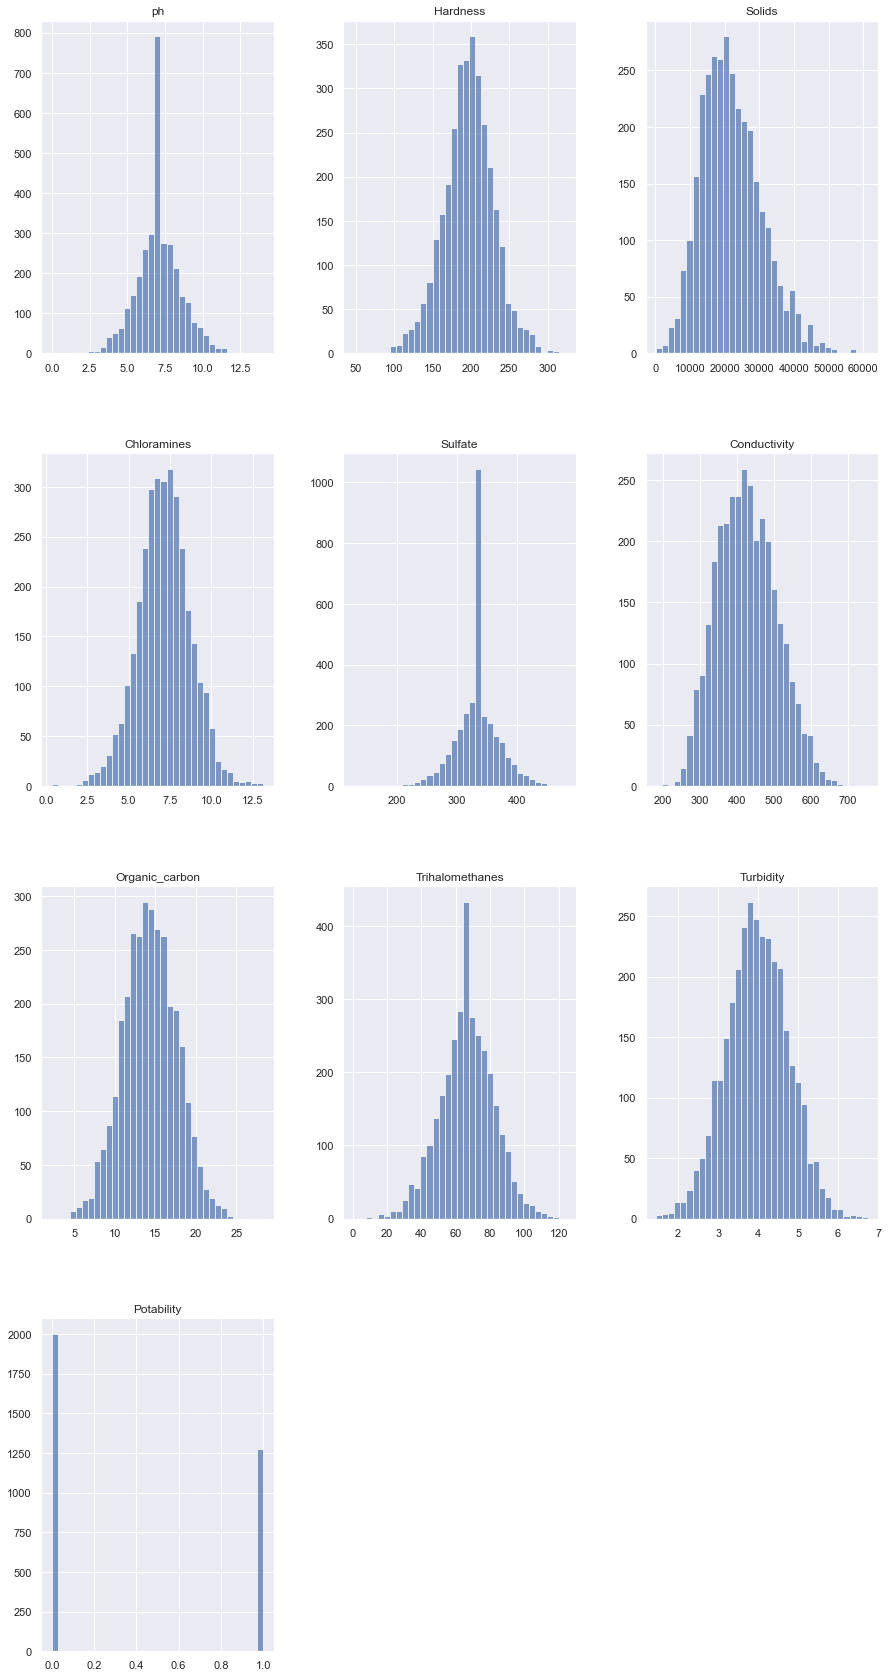

In [14]:
# Create histograms to see the distribution of each column
df.hist(bins=35, figsize=(15, 30), grid=True, alpha=0.7)
plt.show()

# Data Preprocessing (scaling, balancing)

In [15]:
# Check if there are null values
print(df.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [16]:
# Check if the dataset is balanced
print(df['Potability'].value_counts())

0    1998
1    1278
Name: Potability, dtype: int64


In [17]:
# Show info about the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None


In [19]:
# Split the data into the train and test set
X = df[df_columns]
Y = df['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0, stratify=Y)
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (2194, 9), y_train: (2194,), X_test: (1082, 9), y_test: (1082,)


In [20]:
# Scale the data using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.to_numpy())
X_train_scaled = pd.DataFrame(X_train_scaled, columns=df_columns)

X_test_scaled = scaler.fit_transform(X_test.to_numpy())
X_test_scaled = pd.DataFrame(X_test_scaled, columns=df_columns)

In [21]:
#Balance the data using SMOTE
over_sampler = SMOTE(random_state=0)
X_res, y_res = over_sampler.fit_resample(X_train_scaled, y_train)
print(f"Before: {Counter(y_train)}")
print(f"After: {Counter(y_res)}")

Before: Counter({0: 1338, 1: 856})
After: Counter({1: 1338, 0: 1338})


# Logistic regression

In [26]:
# Fit logistic regression model and generate predictions
logistic_regression_model = LogisticRegression(max_iter=200)
logistic_regression_model.fit(X_res, y_res)
logistic_regression_predictions = logistic_regression_model.predict(X_test_scaled)

In [27]:
# Show the predicted values
print(logistic_regression_predictions)

[1 1 1 ... 1 0 0]


In [28]:
# Show the model score on the test data
print(logistic_regression_model.score(X_test_scaled, y_test))

0.5073937153419593


In [29]:
# Predict and show the output for the test data
logistic_regression_test_output = logistic_regression_model.predict(X_test_scaled)
print(logistic_regression_test_output)

[1 1 1 ... 1 0 0]


In [31]:
print(confusion_matrix(logistic_regression_test_output, y_test))

[[343 216]
 [317 206]]


In [33]:
print("Accuracy:", accuracy_score(logistic_regression_test_output, y_test))
print("Precision:", precision_score(logistic_regression_test_output, y_test))
print("Recall:", recall_score(logistic_regression_test_output, y_test))
print("F1 Score:", f1_score(logistic_regression_test_output, y_test))

Accuracy: 0.5073937153419593
Precision: 0.4881516587677725
Recall: 0.3938814531548757
F1 Score: 0.43597883597883597


# Random Forest Classifier

In [34]:
# Import RandomForestClassifier and fit the data
random_forest_model = RandomForestClassifier(random_state=32, n_jobs=-1, oob_score=True, n_estimators=30)

In [35]:
# Fit the data and check the oob score
random_forest_model.fit(X_res, y_res)
print(random_forest_model.oob_score_)

0.6928251121076233


In [36]:
# Predict y using the classifier
random_forest_predictions = random_forest_model.predict(X_test_scaled)

In [37]:
# Evaluate the predictions
print("Accuracy:", accuracy_score(y_test, random_forest_predictions))
print("Precision:", precision_score(y_test, random_forest_predictions))
print("Recall:", recall_score(y_test, random_forest_predictions))
print("F1 Score:", f1_score(y_test, random_forest_predictions))

Accuracy: 0.6256931608133087
Precision: 0.5218508997429306
Recall: 0.48104265402843605
F1 Score: 0.5006165228113441


In [55]:
from sklearn.model_selection import StratifiedKFold
random_forest = RandomForestClassifier(random_state=42, n_jobs=-1)
parameters = {
'max_depth': [5, 10, 20, 50, 100],
'min_samples_leaf': [1, 5, 10, 20, 50, 100, 200],
'n_estimators': [10, 25, 50, 100, 200]
}
grid_search = GridSearchCV(estimator=random_forest, param_grid=parameters, scoring='precision', cv=StratifiedKFold(n_splits=4), n_jobs=-1)

In [56]:
%%time
# Find the best estimator
grid_search.fit(X_res, y_res)
print(grid_search.best_score_)
best_random_forest_model = grid_search.best_estimator_
print(best_random_forest_model)

0.7382695531976451
RandomForestClassifier(max_depth=50, n_estimators=200, n_jobs=-1,
                       random_state=42)
CPU times: total: 4.08 s
Wall time: 1min 9s


In [65]:
# RandomForestClassifier with the tuned hyperparameters
tuned_random_forest_model = RandomForestClassifier(random_state=42, n_jobs=-1, min_samples_leaf=1, 
                                                   n_estimators=200, max_depth=50, oob_score=True)

In [66]:
# Show the out of bag score
tuned_random_forest_model.fit(X_res, y_res)
print(tuned_random_forest_model.oob_score_)

0.7585949177877429


In [67]:
# Create predictions
final_random_forest_predictions = tuned_random_forest_model.predict(X_test_scaled)

In [68]:
# Evaluate the predictions
print("Accuracy:", accuracy_score(y_test, final_random_forest_predictions))
print("Precision:", precision_score(y_test, final_random_forest_predictions))
print("Recall:", recall_score(y_test, final_random_forest_predictions))
print("F1 Score:", f1_score(y_test, final_random_forest_predictions))

Accuracy: 0.6460258780036968
Precision: 0.5498721227621484
Recall: 0.509478672985782
F1 Score: 0.5289052890528905


# K-Nearest Neighbor

Text(0, 0.5, 'Error Rate')

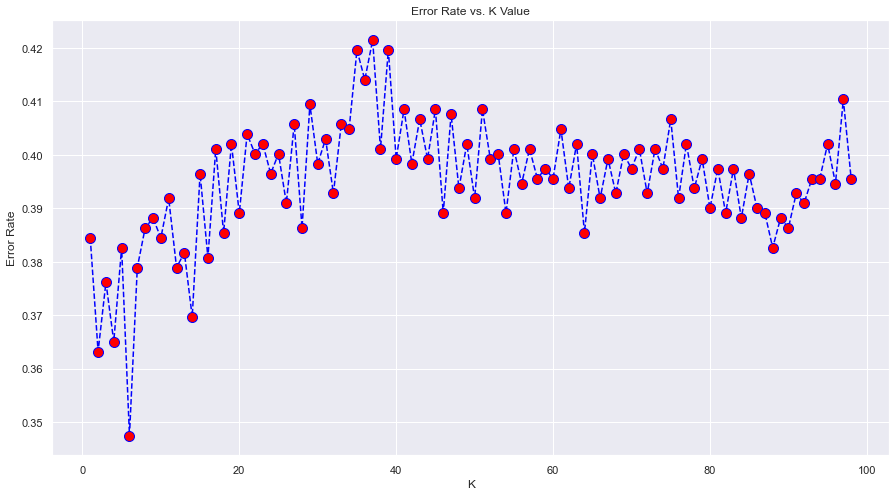

In [70]:
# Find the optimal value for n using the elbow method
error_rates = []
for n in range(1, 99):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_res, y_res)
    predictions = knn.predict(X_test_scaled)
    error_rates.append(np.mean(predictions != y_test))

plt.figure(figsize=(15, 8))
plt.plot(range(1, 99), error_rates, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [72]:
# Fit the model using the optimal value for n
knn_classifier = KNeighborsClassifier(n_neighbors=6, metric='minkowski', p=2)
knn_classifier.fit(X_res, y_res)

KNeighborsClassifier(n_neighbors=6)

In [73]:
# Make predictions
predictions_knn = knn_classifier.predict(X_test_scaled)

In [74]:
# Create a confusion matrix
cm = confusion_matrix(y_test, predictions_knn)
print(cm)

[[496 164]
 [212 210]]


In [75]:
# Evaluate the predictions
print("Accuracy:", accuracy_score(y_test, predictions_knn))
print("Precision:", precision_score(y_test, predictions_knn))
print("Recall:", recall_score(y_test, predictions_knn))
print("F1 Score:", f1_score(y_test, predictions_knn))

Accuracy: 0.6524953789279113
Precision: 0.5614973262032086
Recall: 0.4976303317535545
F1 Score: 0.5276381909547739


In [93]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
# Use a larger set of hyperparameters
param_grid = {
    'n_neighbors': range(1, 50),
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'leaf_size': range(1, 50),
    'p': [1, 2, 3]
}

# Use random search with a larger number of iterations
rs = RandomizedSearchCV(KNeighborsClassifier(), param_grid, n_iter=500,
                        scoring='recall', cv=3, n_jobs=-1, verbose=1)
# Fit the model
rs.fit(X_res, y_res)

# Print the best hyperparameters
print("Best hyperparameters:", rs.best_params_)

# Print the best precision score
print("Best recall score:", rs.best_score_)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
Best hyperparameters: {'weights': 'uniform', 'p': 3, 'n_neighbors': 1, 'metric': 'minkowski', 'leaf_size': 42}
Best recall score: 0.8535127055306427


In [94]:
# Use KNeighborsClassifier with tuned parameters
classifier = KNeighborsClassifier(
    n_neighbors=1,
    metric='minkowski',
    weights='uniform',
    leaf_size=42,
    p=3
)
classifier.fit(X_res, y_res)

KNeighborsClassifier(leaf_size=42, n_neighbors=1, p=3)

In [95]:
# Create predictions
predictions_knn_tuned = classifier.predict(X_test_scaled)

In [96]:
# Create confusion matrix
cm = confusion_matrix(y_test, predictions_knn_tuned)
print(cm)

[[444 216]
 [200 222]]


In [97]:
# Evaluate the predictions
print("Accuracy:", accuracy_score(y_test, predictions_knn_tuned))
print("Precision:", precision_score(y_test, predictions_knn_tuned))
print("Recall:", recall_score(y_test, predictions_knn_tuned))
print("F1 Score:", f1_score(y_test, predictions_knn_tuned))

Accuracy: 0.6155268022181146
Precision: 0.5068493150684932
Recall: 0.5260663507109005
F1 Score: 0.5162790697674419


0.5520520520520521
0.5574341123818995
0.5625958099131323
0.5541016607951686
0.5405679513184585
0.5562847046945987
0.5571642536195707
0.5441396508728179
0.564321608040201
0.5507462686567164
0.5506297229219144
0.5480961923847696
0.5462311557788945
0.5635162601626016
0.5548322483725588
0.5509376583882413
0.557799091367996
0.5529767911200807
0.5564024390243902
0.5431472081218274
0.527708437343984
0.5594334850784016
0.5534718702483528
0.5313597591570497
0.541349568746829
0.5482587064676617
0.5563380281690141
0.5534370296036126
0.5319899244332493
0.5554994954591322
0.5418127190786179
0.562279374684821
0.5352971051295073
0.547883064516129
0.5536694957563655
0.5403386454183267
0.5443101711983888
0.5410579345088161
0.5520361990950227
0.5435
0.5358049771457593
0.5513078470824949
0.5446384039900249
0.5352112676056338
0.5458187280921382
0.5357142857142857
0.555668016194332
0.5543203638201112
0.5471217524197657
0.5635997988939165
0.5570197668525089
0.5324937027707809
0.5603448275862069
0.5437718859

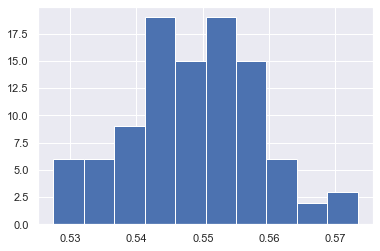

95.0 Confidence interval 55.0% and 56.9%


In [105]:
# While the accuracy and precision is similar on KNN, Logistic Regression and Random Forest
# Recall and F1score for KNN model is higher
# since KNN showed better overall perfomance, it was chosen for next tasks 
# Recall grid search shows better overall results

# Confidence intervals using bootstrap
values = df.values
n_iterations = 100
n_size = int(len(df)*0.5)

stats = list()
for i in range (n_iterations):
    train = resample(values, n_samples = n_size)
    test = np.array([x for x in values if x.tolist() not in train.tolist()])
    
    classifier = KNeighborsClassifier(n_neighbors=5, metric="minkowski", weights="distance", p=2)
    classifier.fit(train[:,:-1],train[:,-1])
    predictions = classifier.predict(test[:,:-1])
    score = accuracy_score(test[:,-1], predictions)
    print(score)
    stats.append(score)
plt.hist(stats)
plt.show()
alpha =0.95
p =(1.0-alpha/2.0)*100
lower = max(0.0, np.percentile(stats,p))
p = (alpha+((1.0-alpha)/2.0))*100
upper = min(1.0, np.percentile(stats,p))
print("%.1f Confidence interval %.1f%% and %.1f%%" % (alpha*100, lower*100, upper*100))

# Support Vector Classifier

In [106]:
# Create SVC model
classifier_svc = SVC(kernel='rbf', C = 1, gamma=1, )
classifier_svc.fit(X_res, y_res)

SVC(C=1, gamma=1)

In [107]:
# Predict the y for test data
y_pred = classifier_svc.predict(X_test_scaled)

In [108]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[563  97]
 [337  85]]


In [109]:
# Evaluate the predictions
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.5988909426987061
Precision: 0.46703296703296704
Recall: 0.2014218009478673
F1 Score: 0.2814569536423841


In [123]:
# Set up the parameter grid for C, gamma, and kernel
param_grid = {'C': np.random.uniform(low=0.1, high=1000, size=50),
              'gamma': np.random.uniform(low=0.0001, high=1, size=50),
              'kernel': ['rbf']}

# Use RandomizedSearchCV to search the parameter grid
grid_search = RandomizedSearchCV(SVC(), param_grid, cv=5, n_iter=50, scoring='recall', n_jobs=-1)

# Fit the model to the data
grid_search.fit(X_res, y_res)

# Print the best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.2f}")


Best parameters: {'kernel': 'rbf', 'gamma': 0.4169824422371068, 'C': 306.74715769799883}
Best cross-validation score: 0.80


In [124]:
# Use the new parameters
svm = SVC( C =306.74715769799883, gamma = 0.4169824422371068,kernel = 'rbf')
svm.fit(X_res, y_res)

SVC(C=306.74715769799883, gamma=0.4169824422371068)

In [125]:
# Predict the y for test data
y_pred = svm.predict(X_test_scaled)

In [126]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[475 185]
 [220 202]]


In [127]:
# Evaluate model 
print("Accuracy:")
print(accuracy_score(y_test, y_pred))
print("Precision:")
print(precision_score(y_test, y_pred))
print("Recall:")
print(recall_score(y_test, y_pred))
print("F1 Score:")
print(f1_score(y_test, y_pred))

Accuracy:
0.6256931608133087
Precision:
0.5219638242894057
Recall:
0.4786729857819905
F1 Score:
0.49938195302843014
